In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
df = pd.read_csv('modified_data.csv')

In [3]:
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redWardsDestroyed,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,...,6,8,0,0,0,0,16567,6.8,197,55
1,0,15,0,0,7,11,4,1,1,0,...,3,14,0,0,0,0,17285,6.8,203,28
2,0,43,1,0,4,5,5,1,0,1,...,2,10,0,0,0,0,16478,7.0,235,47
3,0,75,4,0,6,6,6,0,0,0,...,2,7,1,1,0,0,17404,7.0,225,67
4,1,18,0,0,5,3,6,1,1,0,...,5,2,0,0,0,0,15201,7.0,221,59


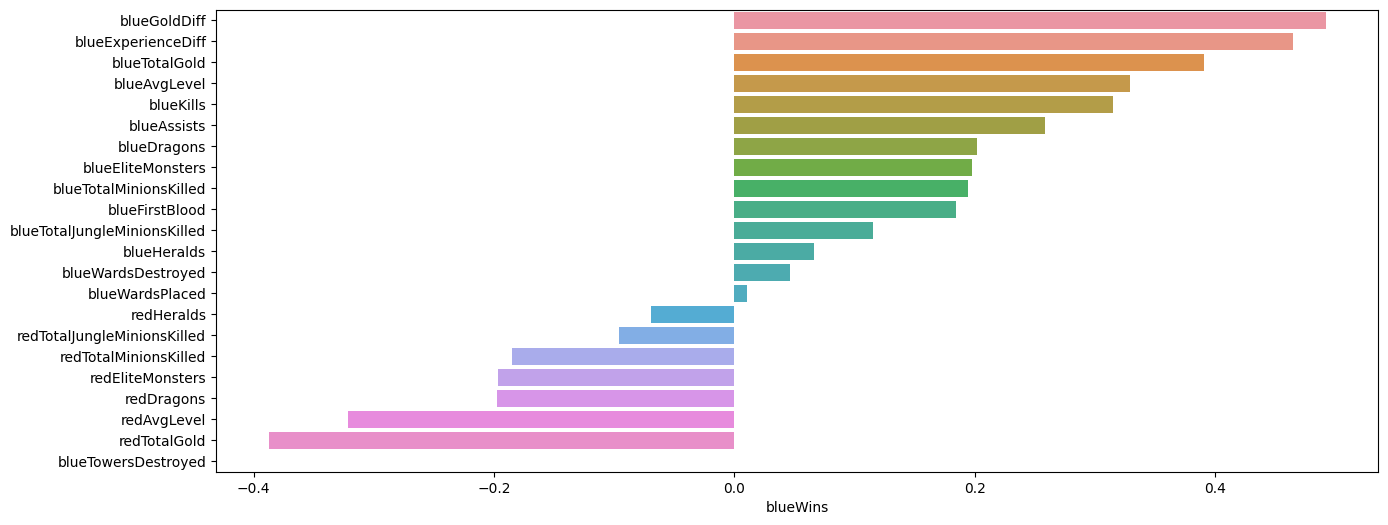

In [4]:
#let's sort correlation of features with blueWins column and drop negetively correlated furture
plt.figure(figsize=(15,6))
dfw = df.corr()['blueWins'].drop(['blueWins','redWardsDestroyed','redWardsPlaced','redTowersDestroyed','redAssists','blueDeaths'])
dfw = dfw.sort_values(ascending=False)
sns.barplot(y=dfw.index, x=dfw)
plt.show()

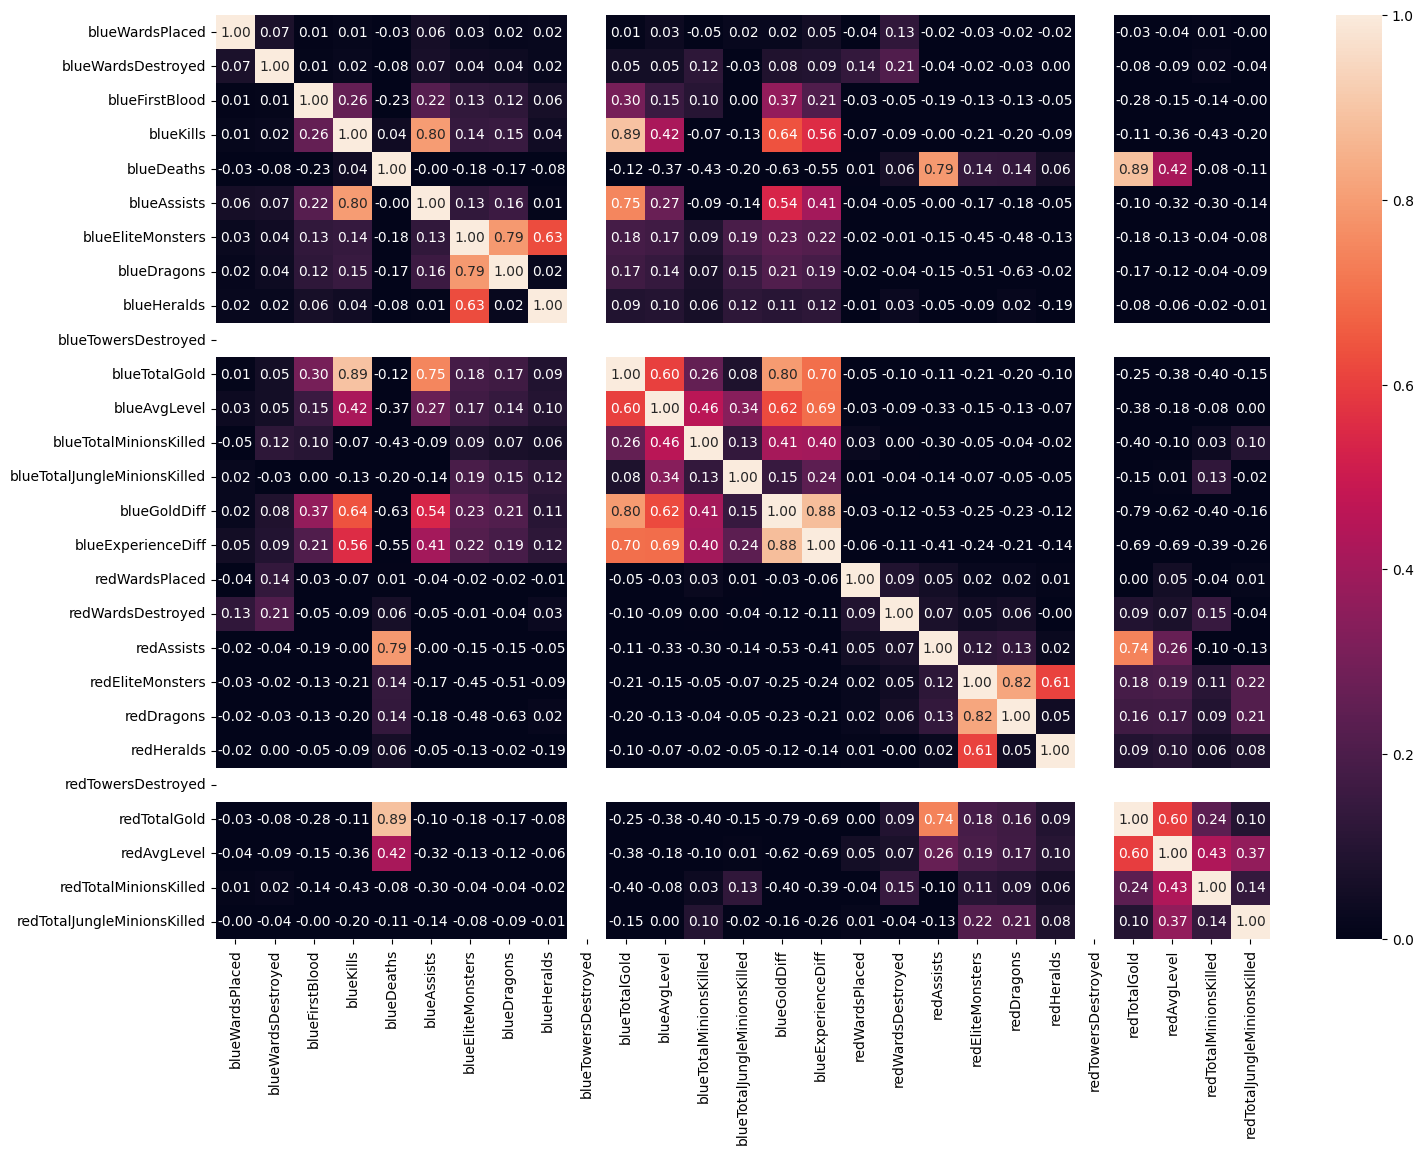

In [5]:
#correlation matrix
plt.figure(figsize=(17, 12))
sns.heatmap(df.drop('blueWins', axis=1).corr(), annot=True, fmt='.2f', vmin=0);

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# prepare the data

X = df.drop('blueWins', axis=1)
y = df['blueWins']
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# build the model
rf = RandomForestClassifier(n_estimators=100, max_depth =10,random_state=42)
rf.fit(X_train, y_train)

# predict on test set
y_pred = rf.predict(X_test)

# evaluate the model
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test set performance metrics:")
print("Accuracy: {:.3f}".format(acc))
print("Precision: {:.3f}".format(prec))
print("Recall: {:.3f}".format(rec))
print("F1-Score: {:.3f}".format(f1))


Train set: (6345, 27) (6345,)
Test set: (1587, 27) (1587,)
Accuracy: 0.7189666036546944
Test set performance metrics:
Accuracy: 0.719
Precision: 0.726
Recall: 0.708
F1-Score: 0.717


In [7]:
max_depths = [5, 10, 15, 20]

for max_depth in max_depths:
    # build the model with the current max_depth
    rf = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42)
    rf.fit(X_train, y_train)

    # predict on test set
    y_pred = rf.predict(X_test)

    # evaluate the model
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy with max_depth= {max_depth}: {acc}")

print ('')

n_estimators = [50, 100, 150, 200]

for n in n_estimators:
    # build the model with the current n_estimators
    rf = RandomForestClassifier(n_estimators=n, max_depth=5, random_state=42)
    rf.fit(X_train, y_train)

    # predict on test set
    y_pred = rf.predict(X_test)

    # evaluate the model
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy with n_estimators= {n}: {acc}")

Accuracy with max_depth= 5: 0.7107750472589792
Accuracy with max_depth= 10: 0.7189666036546944
Accuracy with max_depth= 15: 0.7132955261499685
Accuracy with max_depth= 20: 0.7076244486452425

Accuracy with n_estimators= 50: 0.70825456836799
Accuracy with n_estimators= 100: 0.7107750472589792
Accuracy with n_estimators= 150: 0.7151858853182105
Accuracy with n_estimators= 200: 0.7120352867044738


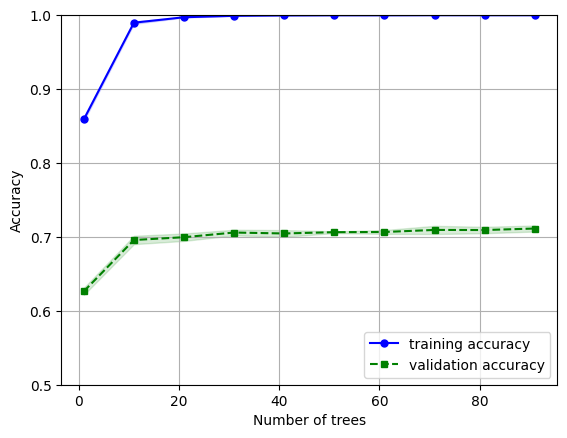

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

# prepare the data
X = df.drop('blueWins', axis=1)
y = df['blueWins']
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

# define parameter grid for n_estimators
param_range = np.arange(1, 101, 10)

# calculate validation curve
train_scores, test_scores = validation_curve(
    RandomForestClassifier(random_state=42), 
    X, y, param_name="n_estimators", 
    param_range=param_range, cv=5, 
    scoring="accuracy", n_jobs=-1)

# calculate mean and standard deviation of scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot validation curve
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')
plt.fill_between(param_range, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()

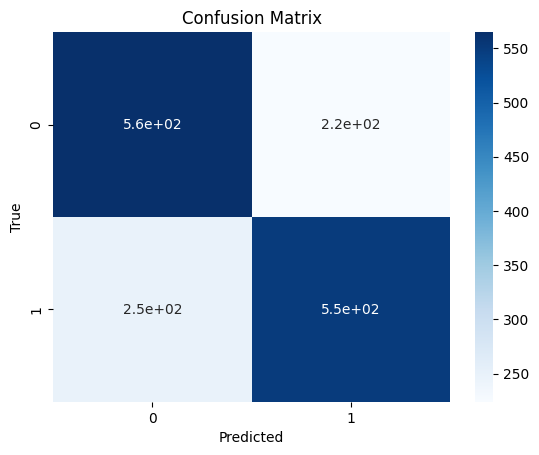

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# predict on test set
y_pred = rf.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Extra Feature selection and hyper tuning steps 

**Feature Importance:** 
Random Forest models come with a built-in features
importance measure, which ranks the importance of each feature based on how much it contributes to the overall performance of the model. You can use this measure to select the top K most important features and exclude the rest.

**SelectKBest Feature Selection** : we use the SelectKBest class from scikit-learn to select the top K features based on the F-score, a statistical test that measures the linear relationship between each feature and the target variable

**PCA feature selection** : PCA feature selection is a statistical technique that is commonly used in machine learning to extract the most relevant information from high-dimensional datasets. It works by identifying the features that explain most of the variance in the data and projecting the data onto a lower-dimensional space that retains most of the important information. This helps to reduce the complexity of the data, remove any irrelevant or redundant features, and improve the performance of machine learning models. The output of PCA feature selection is a set of transformed features, also known as principal components, which can be used for further analysis or model training.



In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings("ignore")

# build the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# select features based on importance
selector = SelectFromModel(rf, threshold='mean', prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# build a new model with selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# predict on test set
y_pred = rf_selected.predict(X_test_selected)

# evaluate the model
acc = accuracy_score(y_test, y_pred)
print('Accuracy: with feature importance', acc)


# select features based on univariate test
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# build a new model with selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# predict on test set
y_pred = rf_selected.predict(X_test_selected)

# evaluate the model
acc = accuracy_score(y_test, y_pred)
print('Accuracy with Select K-best:', acc)

from sklearn.decomposition import PCA

# perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=10, random_state=42)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# build the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# predict on test set
y_pred = rf.predict(X_test)

# evaluate the model
acc = accuracy_score(y_test, y_pred)
print('Accuracy with PCA:', acc)



Accuracy: with feature importance 0.704473850031506
Accuracy with Select K-best: 0.6962822936357907
Accuracy with PCA: 0.702583490863264
